In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing

In [17]:
gold_data = pd.read_csv('gld_price_data.csv')

In [18]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [19]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [20]:
gold_data.shape

(2290, 6)

In [21]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [22]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [23]:
gold_data=gold_data.dropna()

In [24]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [25]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [26]:
correlation = gold_data.corr()

<ipython-input-26-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

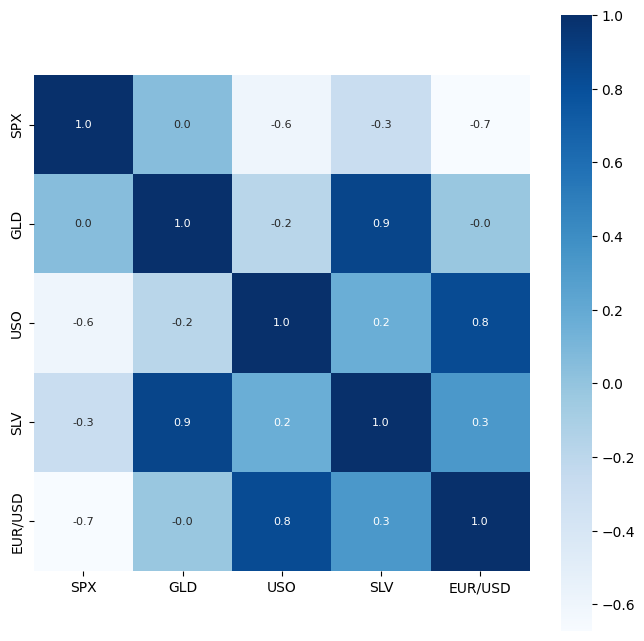

In [27]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8},cmap='Blues')

In [29]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-31-4569879e3289>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

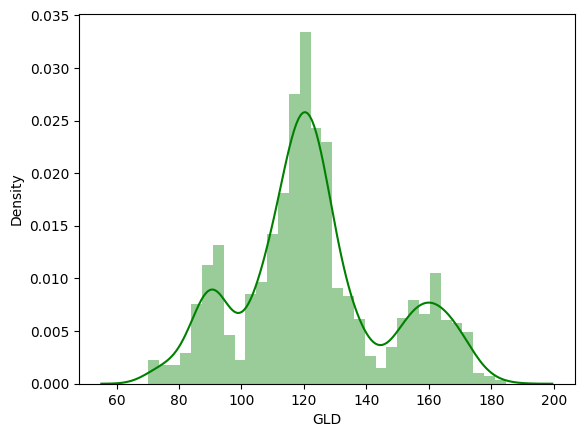

In [31]:
sns.distplot(gold_data['GLD'],color='green')

In [33]:
gold_data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

Splitting the features and Target

In [47]:
X=gold_data.drop(['Date', 'GLD'],axis=1)
Y=gold_data['GLD']

In [48]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [49]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Traing data and test data

In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

model training:Random Forest Regressor



In [51]:
ForestRegressor = RandomForestRegressor(n_estimators = 100)

In [52]:
ForestRegressor.fit(X_train,Y_train)

RandomForestRegressor()

model evaluation for random forest regression

In [53]:
test_data_prediction = ForestRegressor.predict(X_test)

In [54]:
print(test_data_prediction)

[168.76139994  81.86529999 116.10090027 127.5726008  120.67980144
 154.76099742 149.8652989  125.90210049 117.33579886 126.13890018
 116.52160122 171.14190079 141.59459843 167.71089904 115.19450026
 117.68210063 138.28260253 170.30930078 159.66910313 158.39049993
 155.18529994 125.04079976 175.7926002  157.79840288 125.19350062
  93.75600003  76.66730028 120.49829961 119.07769948 167.46480012
  88.2496003  125.42130042  91.21480085 117.88150005 121.06909903
 136.1793009  115.3615016  115.52520086 147.91690018 107.13730109
 104.48430257  87.15129787 126.49330083 117.81789974 152.34829865
 119.69760027 108.35170012 108.18299828  93.32680067 127.08019789
  74.84380029 113.79459915 121.40470035 111.35299918 118.84149904
 120.60839957 159.04419959 170.13970063 147.06609677  85.91839868
  94.25600026  86.66199866  90.58790019 119.00480059 126.42910061
 127.59629982 169.6198993  122.38679931 117.44849889  98.67480068
 168.40580153 143.13479805 132.104603   121.19380215 120.44399926
 119.79230

In [55]:
error_score = metrics.r2_score(Y_test, test_data_prediction)

In [56]:
print("R squared error : ",error_score)

R squared error :  0.9891540496573986


compare the actual values and predicted values in a plot

In [57]:
Y_test_list = list(Y_test)

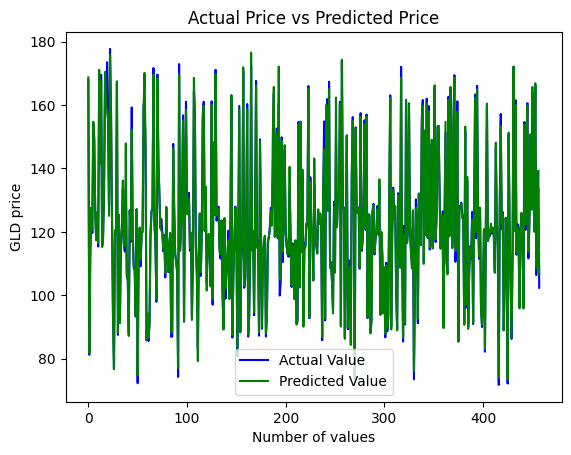

In [58]:
plt.plot(Y_test_list,color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()

In [59]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(Y_test,test_data_prediction))
print('Mean Squared Error: ',metrics.mean_squared_error(Y_test,test_data_prediction))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(Y_test,test_data_prediction)))

Mean Absolute Error:  1.3365629764410463
Mean Squared Error:  5.7206260166167695
Root Mean Squared Error:  2.3917830203880888


Application Phase

In [68]:
SPX=input("ENTER SPX: ").strip()
EUR_USD=input("ENTER EUR_USD: ").strip()
USO=input("ENTER USO: ").strip()
SLV=input("ENTER SLV: ").strip()

ENTER SPX: 1390.189941
ENTER EUR_USD: 1.557099
ENTER USO: 76.05998
ENTER SLV: 15.590


In [71]:
data = {'SPX':[SPX],'USO':[USO],'SLV':[SLV],'EUR/USD':[EUR_USD]}
df=pd.DataFrame(data)

print("USER INPUT DATAFRAME: ")
print(df)

USER INPUT DATAFRAME: 
           SPX       USO     SLV   EUR/USD
0  1390.189941  76.05998  15.590  1.557099


In [72]:
userResult=ForestRegressor.predict(df)
print('The price of gold is : ',userResult)

The price of gold is :  [86.23989907]


model training:Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression

In [61]:
linearRegression = LinearRegression()

In [62]:
linearRegression.fit(X_train,Y_train)

LinearRegression()

model evaluation for linear regression

In [63]:
linear_prediction = linearRegression.predict(X_test)

In [64]:
print(linear_prediction)

[159.45290968  81.50858067 113.4868037  128.55153817 126.20403783
 141.31818338 165.49416492 124.44197659 113.95389904 122.9965895
 113.95492464 174.89529849 132.66890174 159.24793304 118.8791679
 122.14315717 150.37153054 161.27175405 152.2792036  162.19946709
 145.88372183 118.07669395 180.21729122 178.13331554 123.51701986
  98.82914322  76.63486248 119.38435511 113.85027665 159.25706609
  93.76037617 120.05334649  88.61086583 114.28801659 112.77954274
 144.19518102 118.78252489 115.87334354 144.06409553 113.81864246
 100.49676727  89.42842238 120.36720699 110.47635305 146.4894628
 119.30321261 110.99311348 111.3386287   96.48139076 123.40842816
  79.51413425 115.36111603 121.78896764 114.55367722 120.9074622
 117.10612464 152.31198525 182.7735091  196.73570503  91.06670951
 101.92097594  87.48443506  94.33158785 119.17357764 121.8935122
 125.85678089 163.2699701  122.91100556 113.55098736 104.06905043
 155.16775229 176.87972077 125.62460858 113.85896766 119.69577146
 120.03159609 1

In [65]:
error_score = metrics.r2_score(Y_test,linear_prediction)

In [66]:
print("R squared error : ",error_score)

R squared error :  0.8657886565869237


In [67]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(Y_test,linear_prediction))
print('Mean Squared Error: ',metrics.mean_squared_error(Y_test,linear_prediction))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(Y_test,linear_prediction)))

Mean Absolute Error:  5.911486735777762
Mean Squared Error:  70.7889007972153
Root Mean Squared Error:  8.413614015226472
